In [479]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Number of examples.
N = 1000

x1 = np.random.randint(0,2,N)
x2 = np.random.randint(0,2,N)

y_and = x1 & x2
y_or = x1 | x2

x1 = x1 + 0.1*np.random.randn(N,)
x2 = x2 + 0.1*np.random.randn(N,)

dataset_and = np.zeros((len(x1),3))
dataset_or = np.zeros((len(x1),3))
for i in range(len(x1)):
    dataset_and[i,0] = x1[i]
    dataset_and[i,1] = x2[i]
    dataset_and[i,2] = y_and[i]
    dataset_or[i,0] = x1[i]
    dataset_or[i,1] = x2[i]
    dataset_or[i,2] = y_or[i]

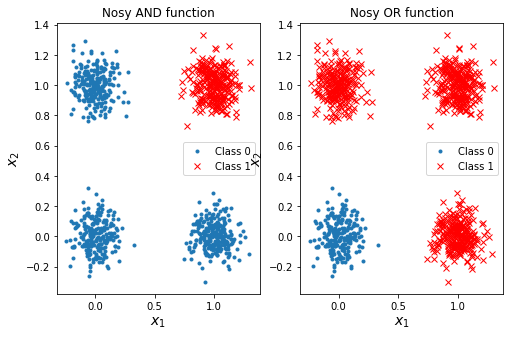

In [480]:
idx0 = np.argwhere(y_and == 0)
idx1 = np.argwhere(y_and == 1)

fig, axes = plt.subplots(1, 2, figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.plot(x1[idx0], x2[idx0], '.', label='Class 0')
plt.plot(x1[idx1], x2[idx1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Nosy AND function')
plt.legend()

idx0 = np.argwhere(y_or == 0)
idx1 = np.argwhere(y_or == 1)

plt.subplot(1, 2, 2)
plt.plot(x1[idx0], x2[idx0], '.', label='Class 0')
plt.plot(x1[idx1], x2[idx1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Nosy OR function')
plt.legend()
plt.show()

In [481]:
# Make a prediction with weights
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
    # Create array for storing error values.
    error_list = np.zeros(n_epoch)
    
    weights_list = []
    weights = [1.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0.0
        train = np.random.permutation(train)
        for row in train:
            prediction = predict(row[:2], weights)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
        #print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        error_list[epoch] = 1/train.shape[0]*sum_error
        weights_list.append(weights)
    min_error_index = np.argmin(error_list)
    min_error = error_list[min_error_index]
    best_weights = weights_list[min_error_index]
    
    return best_weights, error_list

l_rate = 0.1
n_epoch = 10
weights_and, error_and = train_weights(dataset_and, l_rate, n_epoch)

prediction_list = []
for row in dataset_and:
    prediction = predict(row[:2], weights_and)
    prediction_list.append(prediction)
    #print("Expected=%d, Predicted=%d" % (row[-1], prediction))
    
# Calculate and return the accuracy on the test data
accuracy = accuracy_score(y_and, prediction_list)
print('AND accuracy:', accuracy)
    
l_rate = 0.1
n_epoch = 10
weights_or, error_or = train_weights(dataset_or, l_rate, n_epoch)
prediction_list = []
for row in dataset_or:
    prediction = predict(row[:2], weights_or)
    prediction_list.append(prediction)
    #print("Expected=%d, Predicted=%d" % (row[-1], prediction))

# Calculate and return the accuracy on the test data
accuracy = accuracy_score(y_or, prediction_list)
print('OR accuracy:', accuracy)

AND accuracy: 1.0
OR accuracy: 1.0


a)


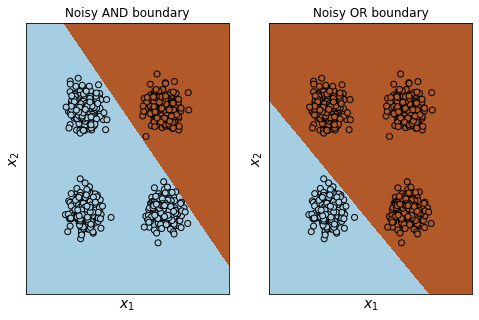

In [484]:
print('a)')
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .002  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
data = np.c_[xx.ravel(), yy.ravel()]

Z_and = np.zeros((xx.shape[0]*xx.shape[1],1))
Z_or = np.zeros((xx.shape[0]*xx.shape[1],1))

incremento = 0
for row in data:
    prediction_and = predict(row, weights_and)
    prediction_or = predict(row, weights_or)
    Z_and[incremento, 0] = prediction_and
    Z_or[incremento, 0] = prediction_or
    incremento += 1
    
# Put the result into a color plot
Z_and = Z_and.reshape(xx.shape)
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, Z_and, cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(x1, x2, c=y_and, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Noisy AND boundary')

# Put the result into a color plot
Z_or = Z_or.reshape(xx.shape)
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, Z_or, cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(x1, x2, c=y_or, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Noisy OR boundary')
plt.show()

b)


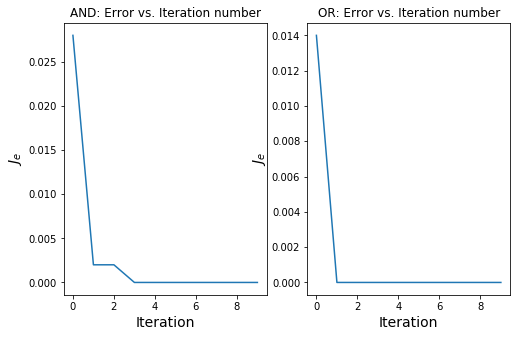

In [485]:
print('b)')
idx0 = np.argwhere(y_and == 0)
idx1 = np.argwhere(y_and == 1)

fig, axes = plt.subplots(1, 2, figsize=(8, 5))
plt.subplot(1, 2, 1)

plt.plot(np.arange(0, n_epoch), error_and[0:n_epoch])
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('$J_e$', fontsize=14)
plt.title('AND: Error vs. Iteration number')

plt.subplot(1, 2, 2)
plt.plot(np.arange(0, n_epoch), error_or[0:n_epoch])
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('$J_e$', fontsize=14)
plt.title('OR: Error vs. Iteration number')
plt.show()